This project uses a Support Vector Machine (SVM) classifier to predict whether a customer is likely to accept a personal loan offer based on demographic and financial data. It demonstrates a machine learning pipeline involving data preprocessing, model training, and evaluation.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, r2_score

Load the dataset

In [2]:
df=pd.read_csv(r"C:\Users\SHAHIN\OneDrive\Desktop\ml project\bank loan svm\Bank_Personal_Loan_Modelling.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


Data processing(dropping unwanted columns)

In [3]:
df = df.drop(columns=["ID", "ZIP Code"])
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Experience          5000 non-null   int64  
 2   Income              5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal Loan       5000 non-null   int64  
 8   Securities Account  5000 non-null   int64  
 9   CD Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 468.9 KB


In [4]:
print(df.isnull().sum())
print('Duplicate:',df.duplicated().sum())


Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64
Duplicate: 13


In [5]:
df.drop_duplicates(inplace=True)
print('Duplicate:',df.duplicated().sum())

Duplicate: 0


SPLITtING DEPENDENT AND INDEPENDANT VALUES

In [6]:
X = df.drop(columns="Personal Loan")
y = df["Personal Loan"]


In [7]:
###TRAIN AND TEST VALUES
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

FEATURE SCALING

In [8]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

MODEL BUILDING

In [9]:
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', class_weight='balanced', random_state=42)
svm_model.fit(X_train_scaled,y_train)

SVC(class_weight='balanced', random_state=42)

PREDICTING & ACCURACY CHECK

In [10]:
y_pred = svm_model.predict(X_test_scaled)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred)

RESULT & CONFUSION MATRIX

In [11]:
print("Confusion Matrix:\n", cm)
print("\nClassification Report:\n", cr)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)
r2 = r2_score(y_test, y_pred)
print("R² Score (for classification, not typical):", r2)

Confusion Matrix:
 [[1294   59]
 [   6  138]]

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98      1353
           1       0.70      0.96      0.81       144

    accuracy                           0.96      1497
   macro avg       0.85      0.96      0.89      1497
weighted avg       0.97      0.96      0.96      1497

Accuracy Score: 0.9565798263193053
R² Score (for classification, not typical): 0.500569721606307


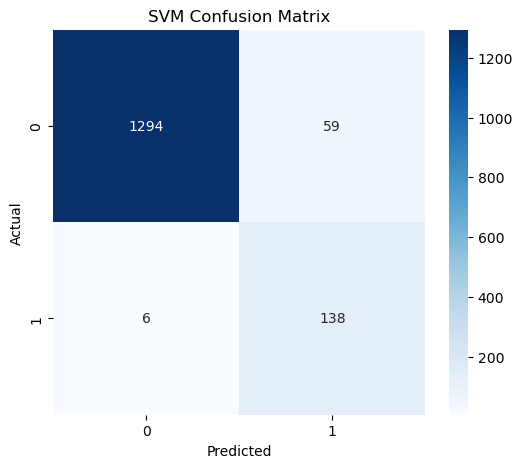

In [12]:
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("SVM Confusion Matrix")
plt.show()

    GIVING NEW SAMPLE INPUT

In [13]:
# Example: New customer data
# Format: [Age, Experience, Income, Family, CCAvg, Education, Mortgage, Securities Account, CD Account, Online, CreditCard]
new_customer = [[45, 20, 60, 2, 2.5, 2, 0, 0, 1, 1, 1]]

# Scale the new data
new_customer_scaled = scaler.transform(new_customer)

# Predict
prediction = svm_model.predict(new_customer_scaled)

# Output
print("Prediction (1 = Loan Approved, 0 = Not Approved):", prediction[0])

Prediction (1 = Loan Approved, 0 = Not Approved): 0


c:\Users\SHAHIN\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


A Support Vector Machine (SVM) classifier was trained to predict whether a customer would accept a personal loan offer based on demographic and financial features.
Key Insights:

-Features like Income, Education, and CCAvg (credit card average usage) had a noticeable impact on loan acceptance.

-SVM proved effective for this binary classification problem, but could benefit from feature scaling and hyperparameter tuning